# libraries used

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#  used to find accuracy

In [3]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# encoding

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# data collection

In [5]:
data=pd.read_csv("survey lung cancer.csv")
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


# CHECKING THE NULL VALUES 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

# visulaization

In [40]:
k=(data["LUNG_CANCER"]=="YES").sum()
print("NUMBER OF PEOPLE HAS LUNG CANCER",k)


NUMBER OF PEOPLE HAS LUNG CANCER 270


In [41]:
l=(data["LUNG_CANCER"]=="NO").sum()
print(f"NUMBER OF PEOPLE DOES NOT HAVE LUNG CANCER ={l}")

NUMBER OF PEOPLE DOES NOT HAVE LUNG CANCER =39


<Axes: xlabel='GENDER', ylabel='SMOKING'>

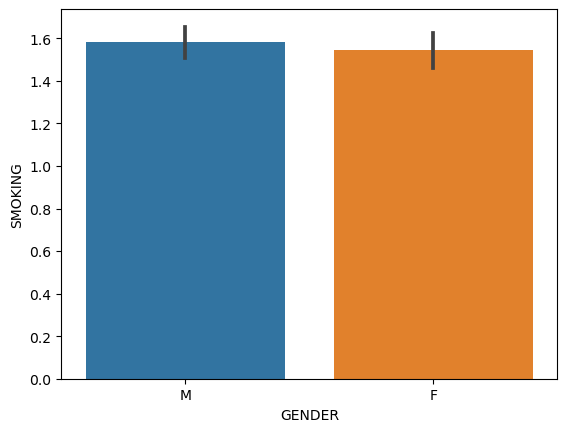

In [7]:
sns.barplot(x="GENDER",y="SMOKING",data=data)

[]

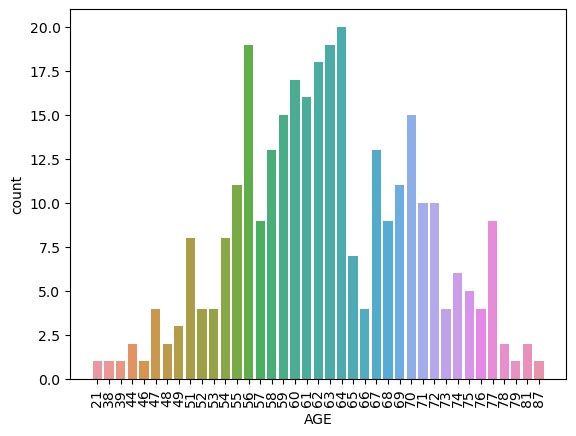

In [43]:
sns.countplot(x=data["AGE"])
plt.xticks(rotation=90)
plt.plot()

<Axes: xlabel='GENDER', ylabel='SMOKING'>

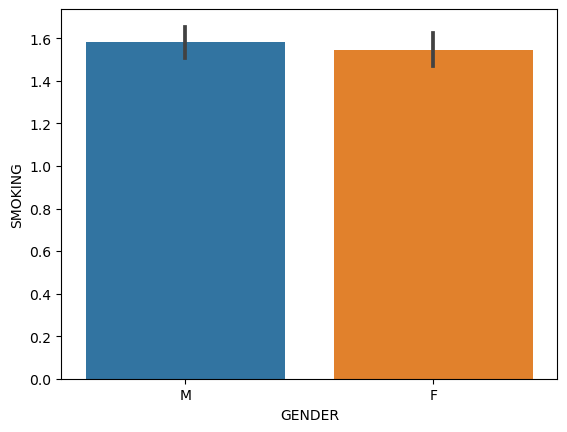

In [44]:
sns.barplot(x="GENDER",y="SMOKING",data=data)

# data transformation

# support vector classifer

In [10]:
x=data.iloc[:,1:15]

In [11]:
y=data.iloc[:,-1:]

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=40,random_state=70)

In [13]:
svm=SVC(kernel="linear")
svm.fit(x_train,y_train)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [14]:
test=svm.predict(x_test)

In [15]:
y_test

,LUNG_CANCER
151,YES
21,YES
235,YES
292,YES
123,YES
189,YES
212,YES
232,YES
207,NO
247,YES


In [16]:
r1=accuracy_score(y_test,test)
r1

0.9

In [17]:
cm=confusion_matrix(y_test,test)
cm

array([[ 3,  3],
       [ 1, 33]])

# desicion tree classifier

In [18]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
test=dt.predict(x_test)

In [20]:
r2=accuracy_score(y_test,test)
r2

0.875

In [21]:
cm=confusion_matrix(y_test,test)
cm

array([[ 3,  3],
       [ 2, 32]])

# naive bayes

In [22]:
nb=GaussianNB()
nb.fit(x_train,y_train)


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [23]:
test=nb.predict(x_test)

In [24]:
r3=accuracy_score(y_test,test)
r3

0.9

In [25]:
cm=confusion_matrix(y_test,test)
cm

array([[ 4,  2],
       [ 2, 32]])

# random foresr classifier

In [26]:
RF=RandomForestClassifier(n_estimators=7)
RF.fit(x_train,y_train)

/var/folders/xt/0lx8pvls0l3_hdw1ht3z0hz00000gn/T/ipykernel_2417/4281800888.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train,y_train)


RandomForestClassifier(n_estimators=7)

In [27]:
test=RF.predict(x_test)

In [28]:
r4=accuracy_score(y_test,test)
r4

0.9

In [29]:
cm=confusion_matrix(y_test,test)
cm

array([[ 3,  3],
       [ 1, 33]])

# input value

In [49]:
input_value=[[7,2,1,1,1,1,2,2,2,2,2,2,1,2]]
status=RF.predict(input_value)
status
if status=="YES":
    print("positive")
else:
    print("negative")


positive


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# creating a dictionary

In [30]:
dict={1:r1,2:r2,3:r3,4:r4}
print(dict)

{1: 0.9, 2: 0.875, 3: 0.9, 4: 0.9}


# creating a dataframe for barplot

,Machine learning Models,Accuracy Score
0,SVC,0.900
1,Navie Bayes,0.900
3,Random Forest,0.900
2,Desicion tree,0.875


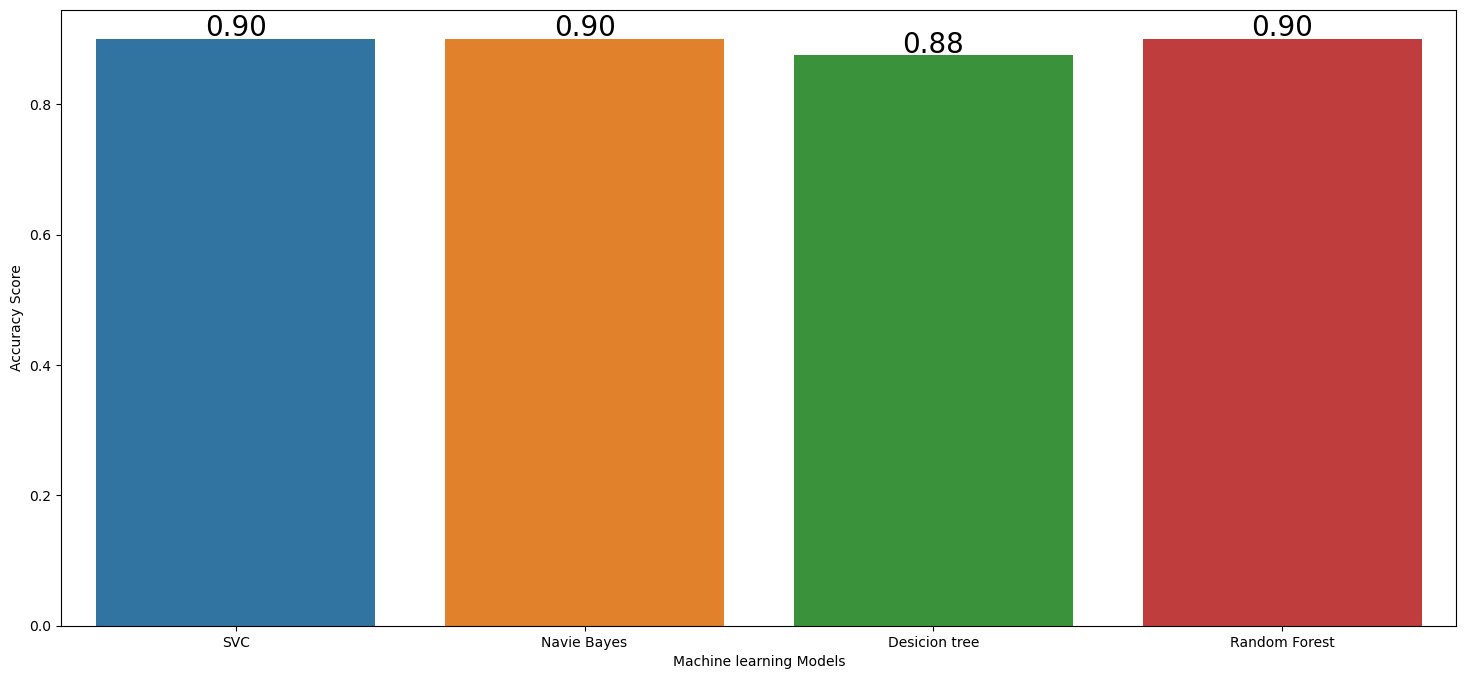

In [61]:
#Creating a DataFrame
x=pd.DataFrame({
    "Machine learning Models":["SVC","Navie Bayes","Desicion tree","Random Forest"],
    "Accuracy Score":[r1,r3,r2,r4]
})

#plotting the Bar Plot
input
plt.figure(figsize=(18,8))
bar_plot=sns.barplot(y="Accuracy Score",x="Machine learning Models",data=x)

#Annotation the bars
for bar in bar_plot.patches:
    bar_plot.annotate(format(bar.get_height(),'.2f'),
                      (bar.get_x()+ bar.get_width() / 2, bar.get_height()),
                      ha="center" , va="center" , size=20, xytext=(0,8),
                      textcoords="offset points")
#(bar.get_height())-denote the x,y coordinates
#offset points is used too improving the readability
#sorting the dataframe by the accuracy score
x.sort_values(by="Accuracy Score",ascending=False)

# conculsion

In [33]:
print("SUPPORT VECTOR CLASSIFIER GOT HIGH ACCURACY")

SUPPORT VECTOR CLASSIFIER GOT HIGH ACCURACY
